In [102]:
from asreviewcontrib.insights.plot import _plot_recall
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import numpy as np

In [103]:
!synergy list


   Nr  Dataset                  Topic(s)                           Records    Included     %
----  -----------------------  -------------------------------  ---------  ----------  ----
   1  Appenzeller-Herzog_2019  Medicine                              2873          26   0.9
   2  Bos_2018                 Medicine                              4878          10   0.2
   3  Brouwer_2019             Psychology, Medicine                 38114          62   0.2
   4  Chou_2003                Medicine                              1908          15   0.8
   5  Chou_2004                Medicine                              1630           9   0.6
   6  Donners_2021             Medicine                               258          15   5.8
   7  Hall_2012                Computer science                      8793         104   1.2
   8  Jeyaraman_2020           Medicine                              1175          96   8.2
   9  Leenaars_2019            Psychology, Chemistry, Medicine       5812     

In [104]:
dataset = "Donners_2021"
n_records = 258

In [105]:
# load all files in output_webserver\simulations\Donners_2021_-m_logistic_-e_doc2vec
metrics = []

for root, dirs, files in os.walk("simulations"):
    for folder_name in dirs:
        if folder_name.startswith(dataset):
            folder_path = os.path.join(root, folder_name)
            for file in os.listdir(folder_path):
                if file.endswith(".json"):
                    with open(os.path.join(folder_path, file), 'r') as f:
                        data = json.load(f)
                        metrics.append(data['data']['items'])

df = pd.DataFrame(metrics)

In [106]:
# load labels list
labels = [[inner_list[1] for inner_list in row] for row in df.iloc[:, 4].apply(lambda x: x['value'])]

In [107]:
def tds_to_records(labels):
    records = []
    for i in range(labels[-1]):
        if i+1 in labels:
            records.append(1)
        else:
            records.append(0)
    return records

def pad_simulation_labels(labels, n_records):
    # if less labels than records, check if all labels available
    if len(labels) < n_records:

        labels = labels + np.zeros(n_records - len(labels)).tolist()

    return labels

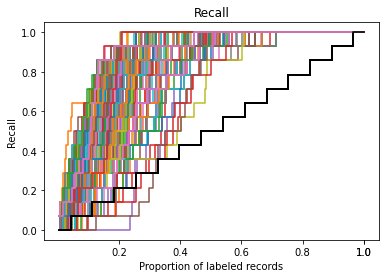

In [108]:
fig, ax = plt.subplots()

for label in labels:
    _plot_recall(ax, pad_simulation_labels(tds_to_records(label), n_records))